## A python notebook on publicly available data on Melbourne city. ##

Data source: 
* http://data.gov.au/dataset/bars-and-pubs-with-patron-capacity
* https://data.melbourne.vic.gov.au/Economy/Employment-by-block-by-industry/b36j-kiy4/data

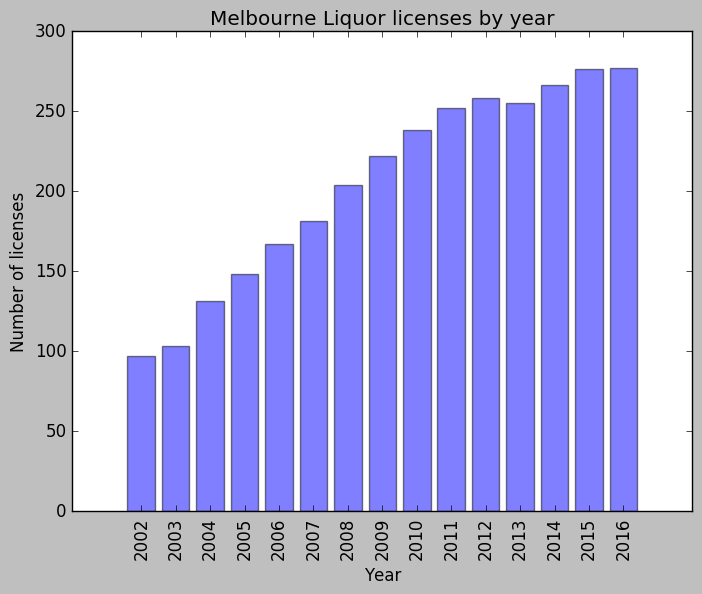

In [8]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
data = pd.read_csv('Bars_and_pubs__with_patron_capacity.csv')   
years = np.unique(data.values[:,0])

data = data.groupby('Census year').count()

y_pos = years
performance = data.values[:,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, years,rotation=90)
plt.ylabel('Number of licenses')
plt.xlabel('Year')
plt.title('Melbourne Liquor licenses by year')

plt.show()




In [2]:
data_raw = pd.read_csv('Bars_and_pubs__with_patron_capacity.csv')   
data_raw.head()


,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Number of patrons,x coordinate,y coordinate,Location
0,2002,247,106238,106238,192-202 Lygon Street,Carlton,Players On Lygon,200,144.967052,-37.802459,"(-37.80245924, 144.9670522)"
1,2002,252,106244,106244,160-162 Lygon Street,Carlton,Bar Centrale,500,144.966770,-37.803442,"(-37.80344164, 144.9667699)"
2,2006,16,104018,104018,172-192 Flinders Street,Melbourne (CBD),Purple Emerald,110,144.968543,-37.816639,"(-37.81663851, 144.9685429)"
3,2002,214,106186,106186,414-422 Lygon Street,Carlton,Percys Bar & Bistro,120,144.967813,-37.796946,"(-37.79694555, 144.9678126)"
4,2008,76,589841,105749,221 Little Lonsdale Street,Melbourne (CBD),JWow Bar,100,144.965703,-37.810658,"(-37.810658, 144.9657034)"


In [3]:
import folium

MELB_COORDINATES = (-37.81, 144.96)

# create empty map zoomed in on Melbourne
Melb_map = folium.Map(location=MELB_COORDINATES, tiles='Stamen Terrain',zoom_start=14)

# for debug purposes
#MAX_RECORDS = 10  
#[0:MAX_RECORDS]

# customised font for popup
html_style="""<style>
body{
   font-family: sans-serif;
   color: #1968FB;
   font-size: 0.9em;
}
</style>"""

html="""<br>"""

for each in data_raw.iterrows():
    popup=html_style+'<b>'+each[1]['Trading name']+'</b>'+html+'licensed # of patrons= '+str(each[1]['Number of patrons'])
    iframe = folium.IFrame(html=popup, width=210, height=60)
    popup = folium.Popup(iframe, max_width=210)
    folium.CircleMarker(
        location = [each[1]['y coordinate'],each[1]['x coordinate']],
        color='#1968FB', fill_color='#1968FB', fill_opacity = '0.3',
        popup=popup,
        radius=each[1]['Number of patrons']/100).add_to(Melb_map)

#display(map)
Melb_map.save("melbournemap.html")

In [10]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=melbournemap.html width=800 height=450></iframe>')